## 3D Imaging Tasks: 3D Reconstruction

[VIDEO LINK](https://youtu.be/_pjKdwndpZ8)

As you have seen, __3D reconstruction__ is creating a 3D image or from the 2D slices. As we have discussed, in computer graphics 3D images are either constructed from meshes (collections of polygons) or from voxels (pixels with coordinates in 3D space). Given how medical images are acquired (we have data about every point of 3D space that our scanner has sampled), voxel-based or volumetric reconstruction is quite often used in medical images to reconstruct 3D images.

__New Vocabulary__
__3D reconstruction__: constructing a 3D model from multiple slices of 3D medical imaging data

## 3D Imaging Tasks: Registration

[VIDEO LINK](https://youtu.be/OexOaHsHkwA)

[VIDEO LINK](https://youtu.be/yvLRj8vd9ms)

In this concept, we have learned about some common 3D imaging tasks such as:

- Windowing
- Multi-planar Registration
- 3D reconstruction
- Registration

Now we are invited to do an exercise where you will implement a simple 3D reconstruction algorithm.

__New Vocabulary__
__Registration__: bringing two different images into the same coordinate space



## Volumetric Rendering

[VIDEO LINK](https://youtu.be/oqsqRDqbJh4)

In this exercise you will use some basic methods of visualizing medical volumes. A CT volume will be loaded for you into numpy array - do not worry too much about file format, what the pixel values are, and the libraries used to load the image - we will get to it in the lessons that follow.

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [4]:
img = nib.load('data/volume.nii.gz')
img

In [5]:
img_np = img.get_fdata()
img_np.shape

(360, 360, 330)

At this point img_np is a numpy 3D array that contains our medical volume, its size is 360 x 360 x 330. 

The first dimension is the X axis, and if we slice the array across it, we will get slices in sagittal plane. The second dimension is the Y axis, and slicing across it will get us the coronal plane. Third dimension is the Z axis and if we slice across it we will get the axial plane. This is a common way of assigning axes to a medical image. Again, in later lessons we will talk in more detail about patient coordinate systems and axes.

Let's visualize a sagittal slice number 100. Remember the _Multi-planar reconstruction_ task we've talked about in the lectures? This is exactly what we are going to do here - for our CT volume, the axial plane is the primary one, and we are reconsructing a cut across a plane orthogonal to the primary one.

Note that we specify the grayscale colormap for matplotlib as this is the method of choice for visualizing medical images.

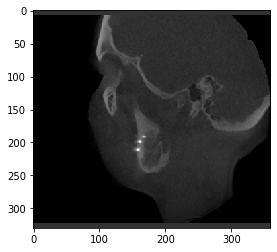

In [24]:
plt.imshow(nd.rotate(img_np[100,:,:], 90), cmap='gray')


Not very clear, eh? Your task in this exercise would be to add up all the slices by going down the X axis and visualize the output - it should become clearer what you are dealing with. This is one method of volume rendering, called orthographic projection.

## Orthographic projection


(360, 330)

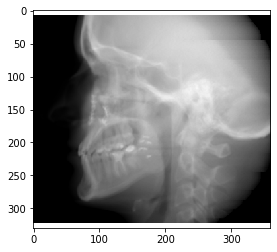

In [28]:
vr = np.zeros((img_np.shape[1], img_np.shape[2]))
vr.shape

for z in range(img_np.shape[0]):
    vr += img_np[z, :, :]
    plt.imshow(nd.rotate(vr, 90),cmap='gray')
#plt.imshow(nd.rotate(vr, 90),cmap='gray')
vr.shape

Can you guess what you are looking at? Does it look like an X-ray image to you? Can you guess why?

This method of volume rendering is rather basic because while it does present all the information from a volume in a single image, it does not really make use of all the colors available to the display, it does not make distinction between tissue types (although the nature of HUs accounts for that somewhat), it does not apply any external lighting or reflections as many 3D rendering engines do. In some cases it would also help to account for perspective to make a more natural-looking image (while sacrificing the preservation of relative distances).

All these things would be improvements, and they would all fall into the category of _transfer function_ design where you would come up with a way to compute the color of the on-screen pixel as you march along the ray cast from your virtual camera into the 3D volume space.

## Maximum Intensity Projection

Another popular method of rendering 3D volumes is called "Maximum Intensity Projection". This method makes sure that maximum values (in case of CT corresponding to the densest structures) are propagated and prominently visualized. A MIP projection can help a physician visualize foreign materials, bones or structures filled with a contrast medium.

You will create a MIP projection in this task.


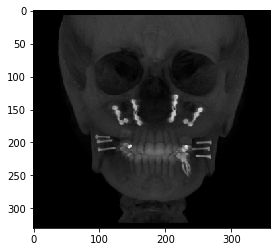

In [34]:
# for a change, lets stack slices along the y axis and thus visualize the coronal plane
mip = np.zeros((img_np.shape[0], img_np.shape[2]))
# task wrtite same loop you wrote above (but going through the y-axis,
# but rather then adding all the values, use np.maximum functiuon
# to save the maximum value of each pixel across our entire slice stack

for y in range(img_np.shape[1]):
    mip = np.maximum(mip, img_np[:,y,:])

plt.imshow(nd.rotate(mip,90), cmap='gray')

Looks impressive, doesn't it? You can clearly see now that this is a scan of the head, and MIP projection makes the implants stand out. You can clearly see a molar implant there, along with some other dental hardware. We will examine this image closer in the lessons that follow
[VIDEO LINK](https://youtu.be/OapVS7XeJwo)

## Common 3D Imaging Tasks: Recap

### Summary
We have touched on some of the most typical tasks that you would likely need to deal with when working with 3D imaging data.

You will probably use __3D reconstruction__ to visualize your volumes. Typically 3D reconstruction capabilities are incorporated into medical imaging viewers and range from basic to very elaborate. In later lessons, we will take a look at some of the tools that you can leverage for this.

__Multi-planar reconstruction__ is something that you will do naturally as you will want to extract slices from volumes. MPR is something that any 3D medical image viewer can do, but a data scientist would likely be dealing with cuts through different planes a lot too. We will see examples of MPR further in this course, and you will be writing your own code to do this.

__Windowing__ task would have you map 10 or more bits of grayscale to the 256 colors your screen could display (or maybe the RGB colorspace). Windowing is the very standard very basic operation of any medical image viewer (not only 3D one)

__Registration__ will pop up if you are looking at tasks that involve combining data from multiple imaging modalities or change of structures in the same patient over time. Registration on its own is not a strictly defined task. There are options - you need to decide e.g. if distances should be preserved in the moving image, or if parallel lines need to be preserved, but the image can be shrunken or expanded. Because of such tradeoffs, registration is always defined within a context of a clinical task. Registration sometimes is available in more advanced image viewers, and there are also tools and libraries that you can lean upon to do it programmatically

An interesting thing about registration is that it can be formulated as an optimization problem. This problem is quite well studied and has some good analytical solutions, but can also be addressed by deep learning methods.

## Further Resources

- [A great overview of registration, methods, and various issues: Alam, Fakhre & Ur Rahman, Sami & Din, Aziz & Qayum, Fawad. (2018). Medical image registration: Classification, applications and issues. Journal of Postgraduate Medical Institute. 32. 300-3007.](https://www.researchgate.net/publication/329363455_Medical_image_registration_Classification_applications_and_issues)
- A couple of papers looking at registration as an optimization problem and applying deep learning methods:
- [Song G, Han J, Zhao Y, Wang Z, Du H. A Review on Medical Image Registration as an Optimization Problem.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5543570/) Curr Med Imaging Rev. 2017;13(3):274–283. doi:10.2174/1573405612666160920123955
- Haskins G, Kruger U, Yan P. (2020). [Deep Learning in Medical Image Registration](https://arxiv.org/pdf/1903.02026.pdf): A Survey. Retrieved Mar 2020 from the arXiv database.

- Siemens Healthineers is doing some great research around the photorealistic rendering of medical volumes. Check out their related webpage to see some of the very compelling ways to do 3D reconstruction: https://www.siemens-healthineers.com/medical-imaging-it/advanced-visualization-solutions/syngovia-cinematic


### Lesson Summary

[VIDEO LINK](https://youtu.be/LfswIFRepUU)
Congrats, this was a lot of material that hopefully put you on a good track to comprehend the context of the problems you would be working with! Now you are ready to start digging deeper into data and machine learning techniques.

In this lesson we have covered the following topics:

- What are 3D medical images?
- Who uses 3D medical images?
- Why are they being used?
- Some example clinical scenarios

After that, we did an exercise on picking a suitable problem for an AI project by tapping into publicly available medical resources.

Then, we jumped into some technical details and covered:

- Physical principles of CT scanners along with an exercise on computing a sinogram
- Physical principles of MR scanners
- Covered basic 3D imaging tasks:
    - Multi-planar reconstruction
    - 3D reconstruction
    - Windowing
    - Registration
    
## Vocabulary
    
Let us leave you with a little vocabulary of the many terms that have been introduced throughout this lesson:

- __Imaging modality__: a device used to acquire a medical image
- __Contrast resolution__: the ability of an imaging modality to distinguish between differences in image intensity
- __Spatial resolution__: the ability of an imaging modality to differentiate between smaller objects
- __CT scanner__: computed tomography scanner
- __Sinogram__ “raw” data generated by CT scanner. Images need to be reconstructed from it
- __MRI scanner__: Magnetic Resonance Imaging scanner
- __K-space data__: “raw” data generated by an MRI scanner. Images need to be reconstructed from it
- __Windowing__: mapping high dynamic range of medical images onto the screen-space gray color scale
- __MPR__: multi-planar reconstruction - extraction of non-primary imaging planes from a 3D volume
- __3D reconstruction__: constructing a 3D model from multiple slices of 3D medical imaging data
- __Registration__: bringing two different images into same patient-centric coordinate space